In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0-dev20190820


In [3]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 形状が (len(sequences), dimension)ですべて0の行列を作る
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # 特定のインデックスに対してresults[i] を１に設定する
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

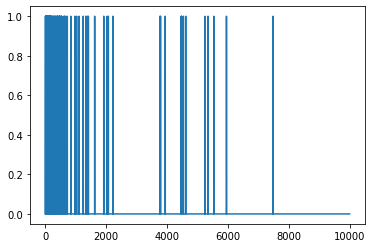

In [4]:
plt.plot(train_data[0])

In [6]:
baseline_model = keras.Sequential([
    # `.summary` を見るために`input_shape`が必要
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.4985 - acc: 0.8096 - binary_crossentropy: 0.4985 - val_loss: 0.3445 - val_acc: 0.8761 - val_binary_crossentropy: 0.3445
Epoch 2/20
25000/25000 - 2s - loss: 0.2577 - acc: 0.9097 - binary_crossentropy: 0.2577 - val_loss: 0.2862 - val_acc: 0.8885 - val_binary_crossentropy: 0.2862
Epoch 3/20
25000/25000 - 2s - loss: 0.1885 - acc: 0.9343 - binary_crossentropy: 0.1885 - val_loss: 0.2875 - val_acc: 0.8857 - val_binary_crossentropy: 0.2875
Epoch 4/20
25000/25000 - 2s - loss: 0.1527 - acc: 0.9480 - binary_crossentropy: 0.1527 - val_loss: 0.3110 - val_acc: 0.8770 - val_binary_crossentropy: 0.3110
Epoch 5/20
25000/25000 - 2s - loss: 0.1250 - acc: 0.9596 - binary_crossentropy: 0.1250 - val_loss: 0.3259 - val_acc: 0.8758 - val_binary_crossentropy: 0.3259
Epoch 6/20
25000/25000 - 2s - loss: 0.1030 - acc: 0.9690 - binary_crossentropy: 0.1030 - val_loss: 0.3533 - val_acc: 0.8728 - val_binary_crossentropy: 0.3533
Ep

In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.5812 - acc: 0.7554 - binary_crossentropy: 0.5812 - val_loss: 0.4636 - val_acc: 0.8424 - val_binary_crossentropy: 0.4636
Epoch 2/20
25000/25000 - 2s - loss: 0.3646 - acc: 0.8822 - binary_crossentropy: 0.3646 - val_loss: 0.3435 - val_acc: 0.8762 - val_binary_crossentropy: 0.3435
Epoch 3/20
25000/25000 - 2s - loss: 0.2687 - acc: 0.9102 - binary_crossentropy: 0.2687 - val_loss: 0.3041 - val_acc: 0.8821 - val_binary_crossentropy: 0.3041
Epoch 4/20
25000/25000 - 2s - loss: 0.2203 - acc: 0.9251 - binary_crossentropy: 0.2203 - val_loss: 0.2876 - val_acc: 0.8864 - val_binary_crossentropy: 0.2876
Epoch 5/20
25000/25000 - 2s - loss: 0.1889 - acc: 0.9364 - binary_crossentropy: 0.1889 - val_loss: 0.2833 - val_acc: 0.8861 - val_binary_crossentropy: 0.2833
Epoch 6/20
25000/25000 - 2s - loss: 0.1667 - acc: 0.9445 - binary_crossentropy: 0.1667 - val_loss: 0.2865 - val_acc: 0.8860 - val_binary_crossentropy: 0.2865
Ep

In [10]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.3394 - acc: 0.8581 - binary_crossentropy: 0.3394 - val_loss: 0.2936 - val_acc: 0.8806 - val_binary_crossentropy: 0.2936
Epoch 2/20
25000/25000 - 5s - loss: 0.1436 - acc: 0.9482 - binary_crossentropy: 0.1436 - val_loss: 0.3332 - val_acc: 0.8719 - val_binary_crossentropy: 0.3332
Epoch 3/20
25000/25000 - 5s - loss: 0.0462 - acc: 0.9866 - binary_crossentropy: 0.0462 - val_loss: 0.4615 - val_acc: 0.8684 - val_binary_crossentropy: 0.4615
Epoch 4/20
25000/25000 - 5s - loss: 0.0076 - acc: 0.9988 - binary_crossentropy: 0.0076 - val_loss: 0.6016 - val_acc: 0.8656 - val_binary_crossentropy: 0.6016
Epoch 5/20
25000/25000 - 5s - loss: 9.0903e-04 - acc: 1.0000 - binary_crossentropy: 9.0903e-04 - val_loss: 0.6769 - val_acc: 0.8695 - val_binary_crossentropy: 0.6769
Epoch 6/20
25000/25000 - 5s - loss: 2.4441e-04 - acc: 1.0000 - binary_crossentropy: 2.4441e-04 - val_loss: 0.7260 - val_acc: 0.8704 - val_binary_crossen

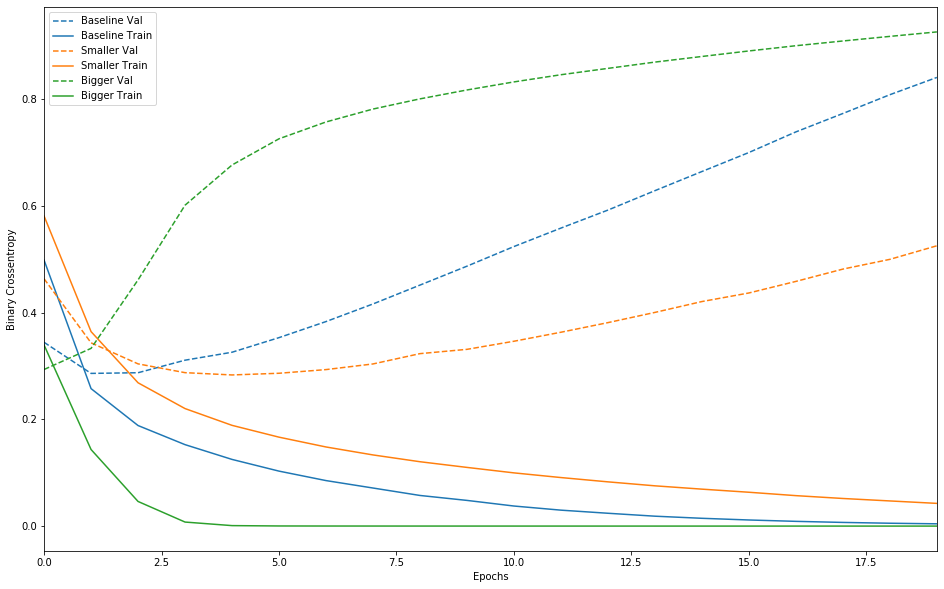

In [12]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [13]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5237 - acc: 0.8073 - binary_crossentropy: 0.4849 - val_loss: 0.3852 - val_acc: 0.8753 - val_binary_crossentropy: 0.3469
Epoch 2/20
25000/25000 - 2s - loss: 0.3052 - acc: 0.9059 - binary_crossentropy: 0.2628 - val_loss: 0.3337 - val_acc: 0.8871 - val_binary_crossentropy: 0.2879
Epoch 3/20
25000/25000 - 2s - loss: 0.2501 - acc: 0.9298 - binary_crossentropy: 0.2015 - val_loss: 0.3344 - val_acc: 0.8865 - val_binary_crossentropy: 0.2839
Epoch 4/20
25000/25000 - 2s - loss: 0.2262 - acc: 0.9403 - binary_crossentropy: 0.1735 - val_loss: 0.3515 - val_acc: 0.8809 - val_binary_crossentropy: 0.2973
Epoch 5/20
25000/25000 - 2s - loss: 0.2092 - acc: 0.9482 - binary_crossentropy: 0.1535 - val_loss: 0.3643 - val_acc: 0.8771 - val_binary_crossentropy: 0.3075
Epoch 6/20
25000/25000 - 2s - loss: 0.1955 - acc: 0.9550 - binary_crossentropy: 0.1374 - val_loss: 0.3780 - val_acc: 0.8755 - val_binary_crossentropy: 0.3191
Ep

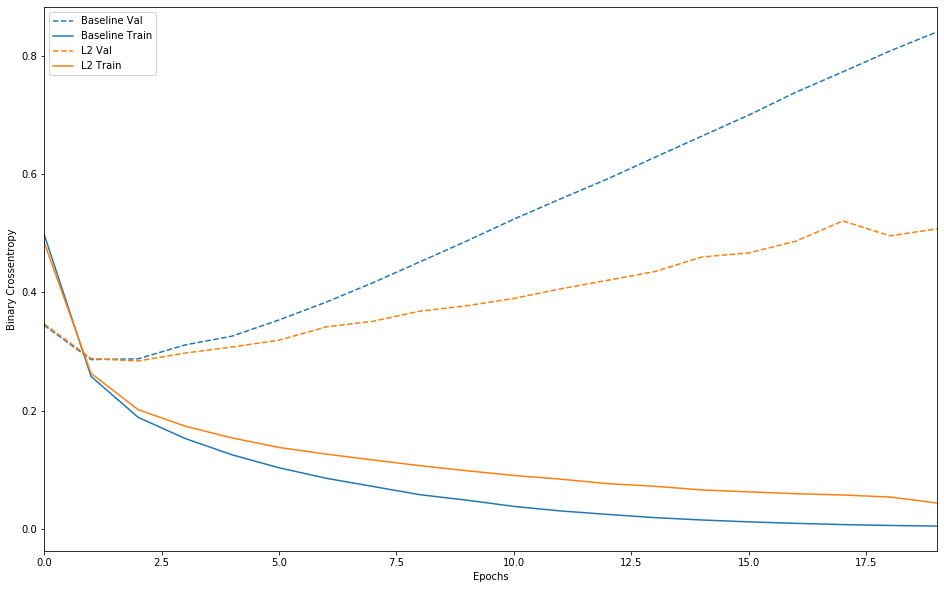

In [14]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6234 - acc: 0.6320 - binary_crossentropy: 0.6234 - val_loss: 0.5060 - val_acc: 0.8536 - val_binary_crossentropy: 0.5060
Epoch 2/20
25000/25000 - 2s - loss: 0.4791 - acc: 0.7893 - binary_crossentropy: 0.4791 - val_loss: 0.3758 - val_acc: 0.8776 - val_binary_crossentropy: 0.3758
Epoch 3/20
25000/25000 - 2s - loss: 0.3818 - acc: 0.8578 - binary_crossentropy: 0.3818 - val_loss: 0.3112 - val_acc: 0.8832 - val_binary_crossentropy: 0.3112
Epoch 4/20
25000/25000 - 2s - loss: 0.3158 - acc: 0.8941 - binary_crossentropy: 0.3158 - val_loss: 0.2900 - val_acc: 0.8838 - val_binary_crossentropy: 0.2900
Epoch 5/20
25000/25000 - 2s - loss: 0.2666 - acc: 0.9153 - binary_crossentropy: 0.2666 - val_loss: 0.2843 - val_acc: 0.8868 - val_binary_crossentropy: 0.2843
Epoch 6/20
25000/25000 - 2s - loss: 0.2343 - acc: 0.9256 - binary_crossentropy: 0.2343 - val_loss: 0.2886 - val_acc: 0.8811 - val_binary_crossentropy: 0.2886
Ep

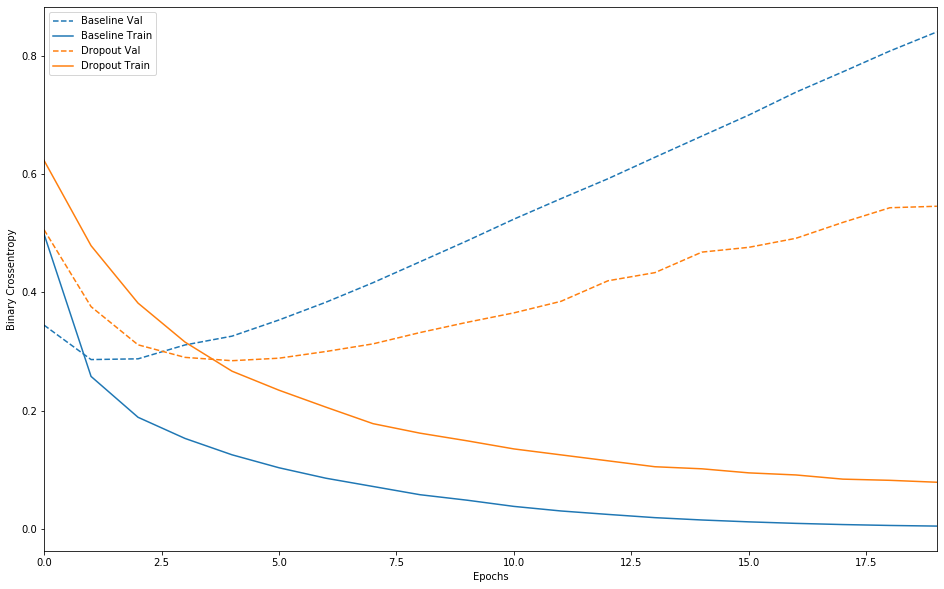

In [16]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])